In [93]:
import os 
import sys
sys.path.append("/home/nshokran/projects/utilities")
#import matrix_factorization_methods
import utils
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, TruncatedSVD

In [2]:
cell_type = "K562"
resolution = 100000
chr_num = 21

In [3]:
contact_mat = utils.create_hic_mat(cell_type,chr_num,chr_num,resolution,'oe')
valid_indices = np.where(np.sum(contact_mat,axis=0)!=0)[0]
contact_mat = contact_mat[np.ix_(valid_indices,valid_indices)]
bias_vec, balanced_mat = utils.balance(contact_mat)
corr_mat = np.corrcoef(contact_mat)
contact_mat_prod = np.multiply(np.transpose(contact_mat),contact_mat)

In [91]:
eval_xTx, evec_xTx = np.linalg.eigh(contact_mat_prod)

In [90]:
eval_x, evec_x = np.linalg.eigh(contact_mat)

In [150]:
mat_PCA = PCA(n_components=10, svd_solver='full')
mat_PCA.fit(balanced_mat)
mat_PCs = mat_PCA.transform(balanced_mat)

In [102]:
corr_mat_PCA = PCA(n_components=10, svd_solver='full')
corr_mat_PCA.fit(corr_mat)
corr_mat_PCs = corr_mat_PCA.transform(corr_mat)

In [118]:
from scipy.sparse.csgraph import laplacian as lap

In [142]:
D = np.diag(np.sum(balanced_mat, axis = 0))
lap_mat = D - balanced_mat
lap_eig_val, lap_eig_vec = np.linalg.eigh(lap_mat)

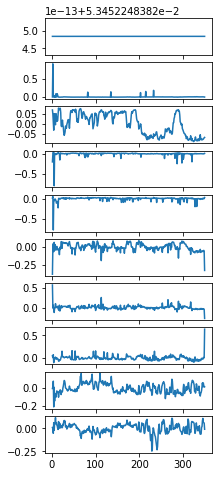

In [148]:
fig, axs = plt.subplots(10, 1,figsize=(3,8))
for i in range(10):
    sns.lineplot(x=np.arange(1,351),y=lap_eig_vec[:,i], ax = axs[i])

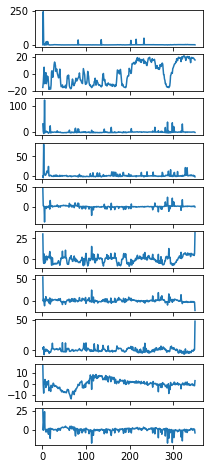

In [151]:
fig, axs = plt.subplots(10, 1,figsize=(3,8))
for i in range(10):
    sns.lineplot(x=np.arange(1,351),y=mat_PCs[:,i], ax = axs[i])

/home/nshokran/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/nshokran/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/nshokran/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  Future

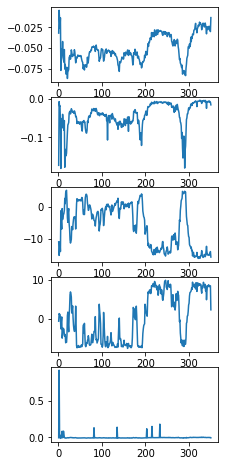

In [146]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1,figsize=(3,8))
sns.lineplot(np.arange(1,351),evec_x[:,349], ax = ax1)
sns.lineplot(np.arange(1,351),evec_xTx[:,349], ax = ax2)
sns.lineplot(np.arange(1,351),mat_PCs[:,0], ax = ax3)
sns.lineplot(np.arange(1,351),corr_mat_PCs[:,0], ax = ax4)
sns.lineplot(np.arange(1,351),lap_eig_vec[:,1], ax = ax5)

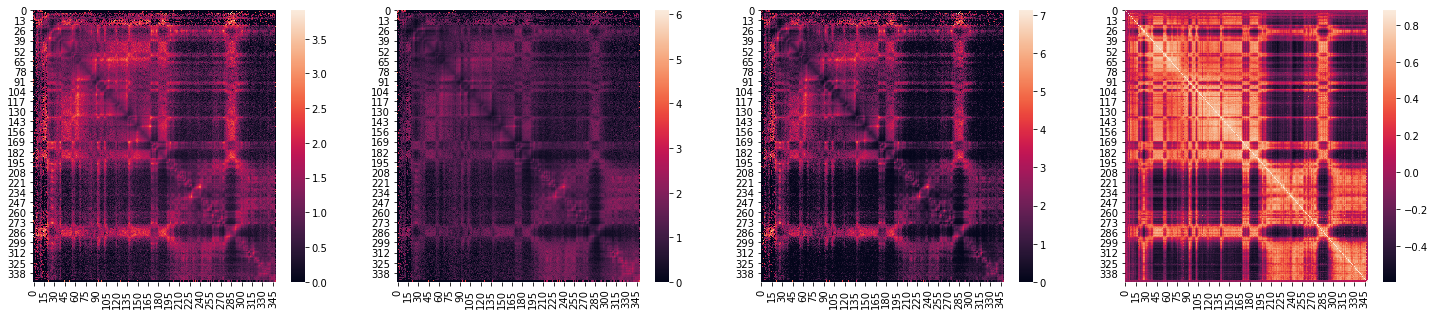

In [125]:
sns.heatmap(np.arcsinh(contact_mat), ax = ax1)
sns.heatmap(np.arcsinh(balanced_mat), ax = ax2)
sns.heatmap(np.arcsinh(contact_mat_prod), ax = ax3)
sns.heatmap(corr_mat, ax = ax4)

In [84]:
compressed_contact_mat = PCA.transform(contact_mat)

In [138]:
TSVDs = {}
for i in range(10):
    TSVDs[i] = TruncatedSVD(n_components=10)
    TSVDs[i].fit(contact_mat)

In [140]:
for i in range(10):
    print(TSVDs[i].singular_values_)

[545.50254225 200.44839291  88.95745188  78.90806096  64.28362554
  63.37030535  56.68811421  53.88342626  51.51558652  46.56531982]
[545.50254225 200.44839291  88.95745187  78.90806184  64.28362621
  63.37030564  56.6881608   53.8837648   51.51803887  46.55846957]
[545.50254225 200.44839291  88.95745175  78.90806173  64.28362169
  63.37026232  56.6882071   53.88386326  51.51675115  46.54673165]
[545.50254225 200.44839291  88.95745187  78.90806195  64.28359148
  63.37029633  56.68812314  53.88386442  51.51794864  46.56354056]
[545.50254225 200.44839291  88.95745179  78.90806128  64.28356276
  63.37030507  56.68814626  53.88366453  51.51842087  46.55634105]
[545.50254225 200.44839291  88.95745186  78.9080619   64.2836018
  63.37029973  56.68827024  53.88381674  51.51785122  46.5639624 ]
[545.50254225 200.44839291  88.95745186  78.90806097  64.28360176
  63.37029034  56.68830077  53.88336765  51.51931604  46.54745169]
[545.50254225 200.44839291  88.95745188  78.90806192  64.28361069
  63

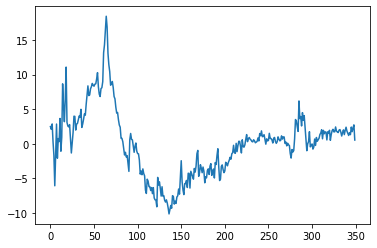

In [90]:
sns.lineplot(x = np.arange(350), y = compressed_contact_mat[:,2])

In [92]:
eig_mat = np.linalg.eigvals(contact_mat)

In [110]:
diag_mat = np.diag(np.sum(contact_mat, axis = 0))

In [117]:
np.all(np.linalg.eigvals(corr_mat)>0)

True

In [82]:
print(PCA.explained_variance_ratio_)

[0.35596447 0.11749871 0.0520502  0.02900774 0.02658451 0.02139935
 0.01945445 0.01832009 0.01650689 0.01435262]


In [83]:
print(PCA.singular_values_)

[231.90464547 133.23633356  88.67829605  66.20077736  63.37536274
  56.8599439   54.21452495  52.6102016   49.93888151  46.56629851]
